## Categorical Summary stats & visualisation
In this notebook we'll look at:
1. Summary stats for categorical variables
2. Visualisation for categorical variables
3. crosstab

In [51]:
import seaborn as sns
import pandas as pd
import numpy as np
import wget

## Download US census data....

In [52]:
wget.download('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names') ##column names & description
wget.download('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data') ##data

'adult (4).data'

In [53]:
feature_pairs = {}
description = []
with open('adult.names') as fh:
    for line in fh:
        if not line.startswith("|") and ":" in line :
            
            splits = line.split(":")
            feature_name = splits[0].strip()
            feature_pairs[feature_name] = list(map(str.strip, splits[1].strip().split(",")))
            
        else:
            description.append(line)

In [54]:
feature_pairs.keys()

dict_keys(['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'])

In [55]:
feature_pairs['occupation']

['Tech-support',
 'Craft-repair',
 'Other-service',
 'Sales',
 'Exec-managerial',
 'Prof-specialty',
 'Handlers-cleaners',
 'Machine-op-inspct',
 'Adm-clerical',
 'Farming-fishing',
 'Transport-moving',
 'Priv-house-serv',
 'Protective-serv',
 'Armed-Forces.']

In [56]:
print("".join(description))

| This data was extracted from the census bureau database found at
| http://www.census.gov/ftp/pub/DES/www/welcome.html
| Donor: Ronny Kohavi and Barry Becker,
|        Data Mining and Visualization
|        Silicon Graphics.
|        e-mail: ronnyk@sgi.com for questions.
| Split into train-test using MLC++ GenCVFiles (2/3, 1/3 random).
| 48842 instances, mix of continuous and discrete    (train=32561, test=16281)
| 45222 if instances with unknown values are removed (train=30162, test=15060)
| Duplicate or conflicting instances : 6
| Class probabilities for adult.all file
| Probability for the label '>50K'  : 23.93% / 24.78% (without unknowns)
| Probability for the label '<=50K' : 76.07% / 75.22% (without unknowns)
|
| Extraction was done by Barry Becker from the 1994 Census database.  A set of
|   reasonably clean records was extracted using the following conditions:
|   ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))
|
| Prediction task is to determine whether a person makes over

In [57]:
import pandas as pd
df = pd.read_csv('adult.data')
df.drop(columns=[" <=50K"], inplace=True)
df.columns=list(feature_pairs.keys())
df.drop(columns=['fnlwgt'], inplace=True)

df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
1,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
2,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
3,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba
4,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States


In [58]:
df.shape

(32560, 13)

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 13 columns):
age               32560 non-null int64
workclass         32560 non-null object
education         32560 non-null object
education-num     32560 non-null int64
marital-status    32560 non-null object
occupation        32560 non-null object
relationship      32560 non-null object
race              32560 non-null object
sex               32560 non-null object
capital-gain      32560 non-null int64
capital-loss      32560 non-null int64
hours-per-week    32560 non-null int64
native-country    32560 non-null object
dtypes: int64(5), object(8)
memory usage: 3.2+ MB


In [60]:
categorical_data = df.select_dtypes(include='object')
categorical_data

,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States
...,...,...,...,...,...,...,...,...
32555,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States
32556,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States
32557,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States
32558,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States


In [61]:
categorical_data['workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [62]:
categorical_data['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

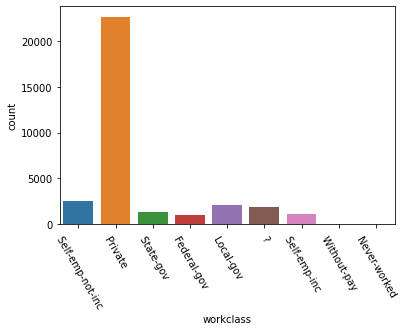

In [63]:
import matplotlib.pyplot as plt
sns.countplot(categorical_data['workclass'])
plt.xticks(rotation=-60)
plt.show()

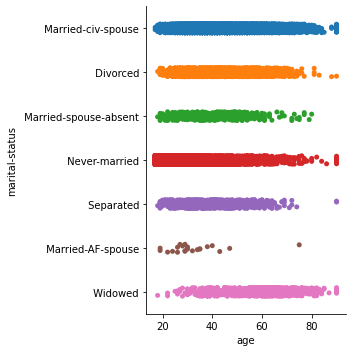

In [64]:
_ = sns.catplot(x="age",y="marital-status",data=df)

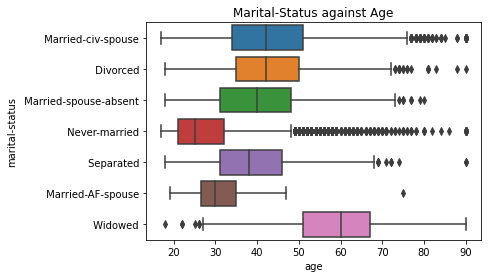

In [65]:
_ = sns.boxplot(x="age", y="marital-status", data=df).set_title("Marital-Status against Age")

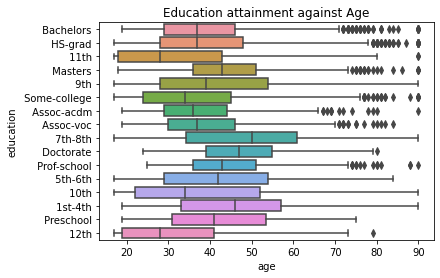

In [66]:
_ = sns.boxplot(x="age", y="education", data=df).set_title("Education attainment against Age")

In [67]:
docs = df[df['education'] == ' Bachelors']

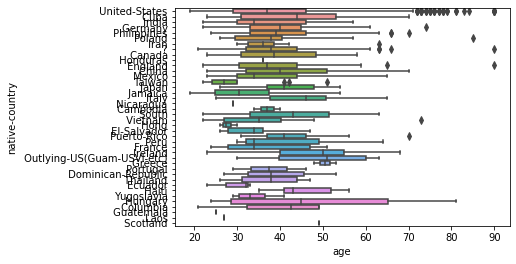

In [68]:
#plt.subplots(figsize=(20,15))
_ = sns.boxplot(x="age", y="native-country", data=docs)

In [69]:
df.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

## cross tab
"cross-tabulation" that shows the frequency or counts of groups within data

Ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.crosstab.html

In [70]:
pd.crosstab(df.sex, df.education, margins=True )

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,All
sex,,,,,,,,,,,,,,,,,
Female,295,432,144,46,84,160,144,421,500,1619,86,3390,536,16,92,2806,10771
Male,638,743,289,122,249,486,370,646,882,3735,327,7111,1187,35,484,4485,21789
All,933,1175,433,168,333,646,514,1067,1382,5354,413,10501,1723,51,576,7291,32560


In [71]:
pd.crosstab(df.sex, df.education, margins=True, normalize='columns')

education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college,All
sex,,,,,,,,,,,,,,,,,
Female,0.316184,0.36766,0.332564,0.27381,0.252252,0.247678,0.280156,0.394564,0.361795,0.302391,0.208232,0.322826,0.311085,0.313725,0.159722,0.384858,0.330805
Male,0.683816,0.63234,0.667436,0.72619,0.747748,0.752322,0.719844,0.605436,0.638205,0.697609,0.791768,0.677174,0.688915,0.686275,0.840278,0.615142,0.669195


In [72]:
pd.crosstab([df.sex, df.race], df.education, margins=True)

education                     10th   11th   12th   1st-4th   5th-6th  \
sex     race                                                           
 Female  Amer-Indian-Eskimo      6      3      0         2         0   
         Asian-Pac-Islander      5     11      4         2         9   
         Black                  64     82     26         8         8   
         Other                   5      6      4         3         4   
         White                 215    330    110        31        63   
 Male    Amer-Indian-Eskimo     10     11      5         2         2   
         Asian-Pac-Islander      8     10      5         3         9   
         Black                  69     71     44         8        13   
         Other                   4      4     10         6         9   
         White                 547    647    225       103       216   
All                            933   1175    433       168       333   

education                     7th-8th   9th   Assoc-acdm   Assoc-voc  \
sex     race                                                           
 Female  Amer-Indian-Eskimo         3     1            5          13   
         Asian-Pac-Islander         4     5           11          11   
         Black                     28    32           58          68   
         Other                      7     4            3           3   
         White                    118   102          344         405   
 Male    Amer-Indian-Eskimo         6     4            3           6   
         Asian-Pac-Islander         7     4           18          27   
         Black                     28    57           49          44   
         Other                     10     4            5           3   
         White                    435   301          571         802   
All                               646   514         1067        1382   

education                     Bachelors   Doctorate   HS-grad   Masters  \
sex     race                                                              
 Female  Amer-Indian-Eskimo           8           2        36         2   
         Asian-Pac-Islander          99           0        82        17   
         Black                      165           4       569        38   
         Other                       14           0        27         4   
         White                     1333          80      2676       475   
 Male    Amer-Indian-Eskimo          13           1        83         3   
         Asian-Pac-Islander         190          28       144        71   
         Black                      165           7       605        48   
         Other                       19           2        51         3   
         White                     3348         289      6228      1062   
All                                5354         413     10501      1723   

education                     Preschool   Prof-school   Some-college    All  
sex     race                                                                 
 Female  Amer-Indian-Eskimo           0             1             37    119  
         Asian-Pac-Islander           3             7             76    346  
         Black                        1             5            399   1555  
         Other                        0             0             25    109  
         White                       12            79           2269   8642  
 Male    Amer-Indian-Eskimo           0             1             42    192  
         Asian-Pac-Islander           3            34            132    693  
         Black                        4            10            347   1569  
         Other                        2             4             26    162  
         White                       26           435           3938  19173  
All                                  51           576           7291  32560